# Sur-apprentissage, biais-variance

Voici les codes qui illustrent le cours de M. Vigon. 

In [0]:
import os
"to load assets on the server (if this was not already done)"
if not os.path.exists("assets_ml"):
  !git clone https://github.com/vincentvigon/assets_ml
else:
  print("assets already here")

Cloning into 'assets_ml'...
remote: Counting objects: 63, done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 63 (delta 13), reused 61 (delta 11), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [0]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.pipeline

import warnings
from IPython.display import Image
import os


plt.style.use("default")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(linewidth=500)
# Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")



        
assert os.path.exists("assets_ml"), "please import assets via git"

## Jeux de données 'oxydo' $\hookleftarrow$

Observons maintenant des données venant d'une expérience chimique. Les données sont séparées en `train` et `test`

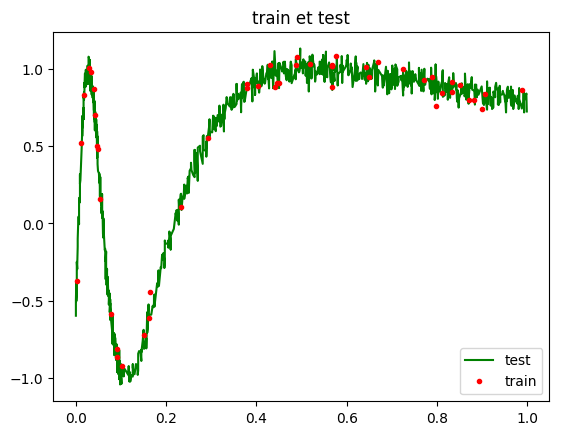

In [0]:
"""  observons les données"""

z = np.loadtxt("assets_ml/dataframe/oxydo_train.csv", delimiter=",")
x_train, y_train = z[:, 0], z[:, 1]

z_test = np.loadtxt("assets_ml/dataframe/oxydo_test.csv", delimiter=",")
x_test,y_test = z_test[:, 0],z_test[:, 1]

plt.plot(x_test, y_test, label="test", c="green")
plt.plot(x_train, y_train, ".", label="train", c="red")

plt.title("train et test")
plt.legend(loc=4);

In [0]:
""" fonction pour augmenter les données """
def expand_x(x,freqMax):
    """ une ligne de 1 et une ligne contenant x """
    x_exp = [np.ones_like(x),x]
    """ on rajoute les sin/cos de x """
    for i in range(1, freqMax + 1):
        x_exp.append(np.sin(2. * np.pi * i * x))
        x_exp.append(np.cos(2. * np.pi * i * x))

    """ on transpose pour avoir les descripteurs en colonnes"""
    return np.array(x_exp).T

***A vous:*** Transformez $(3\heartsuit)$ la fonction ci-dessus en une classe qui respecte de design de `sklearn`.

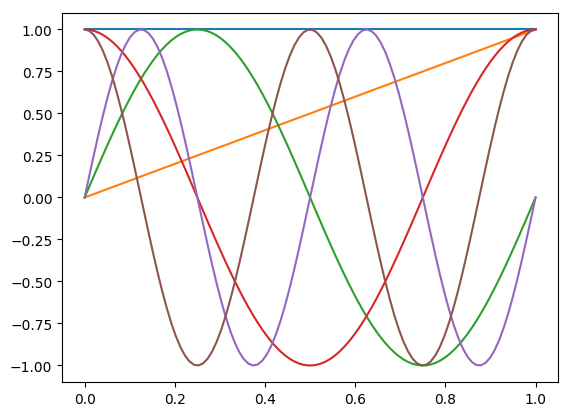

In [0]:
a=np.linspace(0,1,100)
A_ext=expand_x(a,2)
plt.plot(a,A_ext);

***A vous:*** Quelle $(1\heartsuit)$ théorie nous indique qu'un modèle avec des extentions sin-cos permet de reconstituer toutes les fonctions? Toutes $(1\heartsuit)$?  Que $(1\heartsuit)$ se passerait-il si on n'ajoutait que les cosinus?

***A vous:*** Pourquoi $(2\heartsuit)$ intuitivement  vaut-il mieux utiliser des sinus-cosinus plutôt que des polynomes pour les données oxydo?

***Exo:***   Dans cette exo, vous avez entièrement le choix de la manière de coder: utiliser uniquement vos objets, ou bien les objets de `sklearn` ou bien un mixe des deux. On essaiera de présenter les résultats de manière compacte (superposez les courbes plutot que de les mettre les unes en desous des autres), et sympathique (comparez les erreurs avec des courbes plutôt qu'avec des tableaux de chiffres). 

* Entrainez $(9\diamondsuit)$ plusieurs modèles sin-cos sur les données train. Affichez la mse (Mean square error) en fonction du paramètre `freqMax`. Affichez les mse liées au données `train` et `test`

* Comparez $(4\diamondsuit)$ les mse des modèles sin-cos et polynomiaux pour ce jeu de donnée (on essaiera de les comparer 'objectivement') 

## La balance (trade-off) biais-variance

In [0]:
def extractTrainDataRandomly(trainSize,z):
    shuffleIndex = np.random.permutation(z.shape[0])
    selectedIndices=shuffleIndex[:trainSize]
    x_train = z[selectedIndices, 0]
    y_train = z[selectedIndices, 1]
    return x_train,y_train

def predictionFunction_sinCos(x_train,y_train,x_test,freqMax):
    x_train_exp=expand_x(x_train,freqMax)
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train_exp, y_train)
    x_test_exp=expand_x(x_test,freqMax)
    return model.predict(x_test_exp)

tuning: 1
tuning: 2
tuning: 3
tuning: 4
tuning: 5
tuning: 6


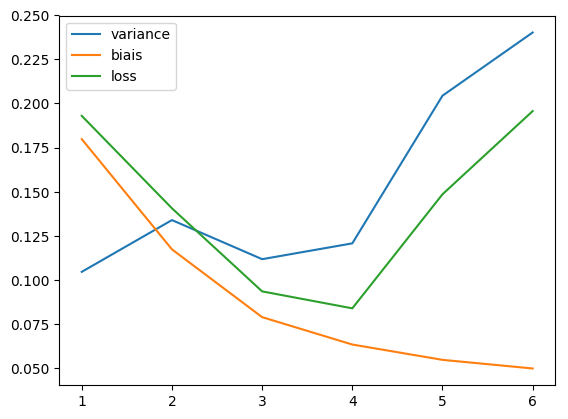

In [0]:
trainSize = 50
nbEssaies=200

z_test = np.loadtxt("assets_ml/dataframe/oxydo_test.csv", delimiter=",")
x_test = z_test[:, 0]
y_test = z_test[:, 1]
test_size=len(x_test)

tunings=[1,2,3,4,5,6]
tuning_to_variances=[]
tuning_to_bias=[]
tuning_to_loss=[]

z_train = np.loadtxt("assets_ml/dataframe/oxydo_big_train.csv", delimiter=",")

for tuning in tunings:
    print("tuning:",tuning)
    estimations= np.zeros([nbEssaies,test_size])
    for essaie in range(nbEssaies):
        x_train, y_train = extractTrainDataRandomly(trainSize,z_train)
        
        y_test_hat = predictionFunction_sinCos(x_train, y_train, x_test, tuning)  
        estimations[essaie,:]=y_test_hat
        
    """le premier np.mean c'est la moyenne sur les données test.
    la seconde opération s'effectue sur les différents essaies."""
    tuning_to_variances.append(np.mean(  np.std (estimations,axis=0)))
    tuning_to_bias.append     (np.mean( (np.mean(estimations,axis=0)-y_test)**2))
    tuning_to_loss.append     (np.mean( (estimations-y_test)**2   ))
    
plt.plot(tunings,tuning_to_variances,label="variance")
plt.plot(tunings,tuning_to_bias,label="biais")
plt.plot(tunings,tuning_to_loss,label="loss")

plt.legend(loc=2);


***A vous:***  

*  plus le paramètre 'tuning' est grand et plus la flexibilité du modèle est grande/petite $(1\heartsuit)$?
* D'après l'étude que l'on vient de faire, quel est le meilleurs tuning $(1\heartsuit)$?
* Est-ce que la loss est vraiment égale à la somme du biais et de la variance $(1\heartsuit)$?

si votre patron veut favoriser la 'reproductibilité' (ou robustesse) de vos expériences, quel tuning choisir ?
si votre patron préfère avoir le meilleurs ajustement possible,  quel tuning choisir ?